## 0. Import required libraries

In [1]:
import geopandas as gpd


## 1. Import U.S. Census data for Hennepin County, MN

In [16]:
gdf = gpd.read_file("mn_2020_census_blocks_hennepin.geojson")


## 2. Define function to build a district using breadth-first search from a given starting block

Inputs:
1. `geodataframe` - the GeoPandas DataFrame that contains all the Census information
2. `current_block` - the Census block that it used to initialize the breadth-first search
3. `dictionary` - a dictionary where the keys are all FIDs, which are unique numeric identifiers that each correspond to one Census block. Tthe values are either 0 or 1, depending on whether the block is part of the district (1) or not (0). This dictionary will be updated while the function runs. Initially, all values are 0 in the dictionary.
4. `population_target` - as soon as the population of the district exceeds this value, the algorithm stops running and returns.
5. `current_population` - a running total of the population of the district as it's being built. The default value for this number is 0 because the district is initially empty, but the number will grow as blocks are added to the district.

In [17]:
def build_district(geodataframe, starting_block, dictionary, population_target, current_population=0):
    queue = []
    queue.append(starting_block)
    dictionary[starting_block.FID] = 1
    
    while current_population < population_target:
        block = queue.pop(0)
        neighbors = geodataframe[geodataframe.geometry.touches(block.geometry)]

        for neighbor in neighbors.itertuples():
            if dictionary[neighbor.FID] == 0:       # if this block is not already in the dictionary, add it
                dictionary[neighbor.FID] = 1
                current_population += neighbor.POPULATION       # update the population of the district
                queue.append(neighbor)

## 3. Build the dictionary that will assist the above function in building a district

In [18]:
block_dict = {} # keys are FIDs, values are whether this block has been added into a district (1 yes, 0 no)

for block in gdf.itertuples():
    block_dict[block.FID] = 0

## 4. Build the district

In [19]:
build_district(gdf, gdf.iloc[0], block_dict, 100000, 0)
gdf['district'] = block_dict.values()

## 5. Plot the district

<Axes: >

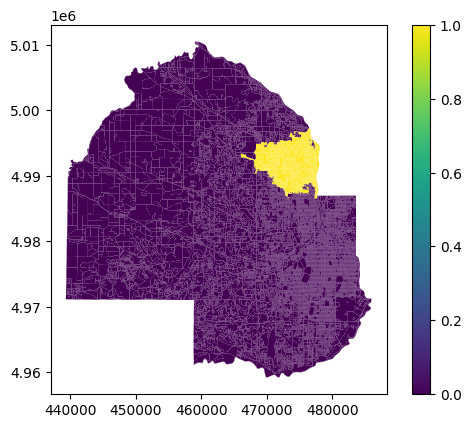

In [20]:
# yellow values (1) are part of the district; purple values (0) are not
gdf.plot(column='district', legend=True)